In [1]:
import torch
import numpy as np
import torchvision
import torchvision.transforms as transforms

In [2]:
transform = transforms.Compose(
    [transforms.ToTensor()])

trainset = torchvision.datasets.CIFAR10(root='./data', train=True,
                                        download=True, transform=transform)
trainloader = torch.utils.data.DataLoader(trainset, batch_size=500,
                                          shuffle=True, num_workers=2)

testset = torchvision.datasets.CIFAR10(root='./data', train=False,
                                       download=True, transform=transform)
testloader = torch.utils.data.DataLoader(testset, batch_size=2,
                                         shuffle=False, num_workers=2)

Files already downloaded and verified
Files already downloaded and verified


In [3]:
for i_batch, sample_batched in enumerate(trainloader):
    if(i_batch!=0):
        break
    batch = sample_batched
data = batch[0]
labels = batch[1]
print(type(data), data.shape, labels.shape)

<class 'torch.Tensor'> torch.Size([500, 3, 32, 32]) torch.Size([500])


In [4]:
from torchvision import models, transforms
import torch.nn as nn
model = models.resnet101(pretrained=True)
model_weights = [] # we will save the conv layer weights in this list
conv_layers = [] # we will save the 49 conv layers in this list
# get all the model children as list
model_children = list(model.children())

In [5]:
# for i in model_children:
#     print(i)
#     print('-'*10)

In [6]:
counter = 0 
# append all the conv layers and their respective weights to the list
for i in range(len(model_children)):
    if type(model_children[i]) == nn.Conv2d:
        counter += 1
        model_weights.append(model_children[i].weight)
        conv_layers.append(model_children[i])
    elif type(model_children[i]) == nn.Sequential:
        for j in range(len(model_children[i])):
            for child in model_children[i][j].children():
                if type(child) == nn.Conv2d:
                    counter += 1
                    model_weights.append(child.weight)
                    conv_layers.append(child)
print(f"Total convolutional layers: {counter}")

Total convolutional layers: 100


In [7]:
for weight, conv in zip(model_weights, conv_layers):
    # print(f"WEIGHT: {weight} \nSHAPE: {weight.shape}")
    print(f"CONV: {conv} ====> SHAPE: {weight.shape}")

CONV: Conv2d(3, 64, kernel_size=(7, 7), stride=(2, 2), padding=(3, 3), bias=False) ====> SHAPE: torch.Size([64, 3, 7, 7])
CONV: Conv2d(64, 64, kernel_size=(1, 1), stride=(1, 1), bias=False) ====> SHAPE: torch.Size([64, 64, 1, 1])
CONV: Conv2d(64, 64, kernel_size=(3, 3), stride=(1, 1), padding=(1, 1), bias=False) ====> SHAPE: torch.Size([64, 64, 3, 3])
CONV: Conv2d(64, 256, kernel_size=(1, 1), stride=(1, 1), bias=False) ====> SHAPE: torch.Size([256, 64, 1, 1])
CONV: Conv2d(256, 64, kernel_size=(1, 1), stride=(1, 1), bias=False) ====> SHAPE: torch.Size([64, 256, 1, 1])
CONV: Conv2d(64, 64, kernel_size=(3, 3), stride=(1, 1), padding=(1, 1), bias=False) ====> SHAPE: torch.Size([64, 64, 3, 3])
CONV: Conv2d(64, 256, kernel_size=(1, 1), stride=(1, 1), bias=False) ====> SHAPE: torch.Size([256, 64, 1, 1])
CONV: Conv2d(256, 64, kernel_size=(1, 1), stride=(1, 1), bias=False) ====> SHAPE: torch.Size([64, 256, 1, 1])
CONV: Conv2d(64, 64, kernel_size=(3, 3), stride=(1, 1), padding=(1, 1), bias=False

In [8]:
print(data.shape)
results = [conv_layers[0](data)]
print(results[0].shape)
for i in range(1, len(conv_layers)):
    # pass the result from the last layer to the next layer
    results.append(conv_layers[i](results[-1]))
    print(results[-1].shape)
# make a copy of the `results`plt.scatter(ty,[i for i in range(len(ty))])
# outputs = results[-1]#.view(results[-1].shape[0],-1)
# print(outputs.shape)
m = nn.AvgPool2d(2, stride=2)
output = m(results[-1])
outputs = output.view(output.shape[0],-1)
print(outputs.shape)
out = outputs.cpu().detach().numpy()

torch.Size([500, 3, 32, 32])
torch.Size([500, 64, 16, 16])
torch.Size([500, 64, 16, 16])
torch.Size([500, 64, 16, 16])
torch.Size([500, 256, 16, 16])
torch.Size([500, 64, 16, 16])
torch.Size([500, 64, 16, 16])
torch.Size([500, 256, 16, 16])
torch.Size([500, 64, 16, 16])
torch.Size([500, 64, 16, 16])
torch.Size([500, 256, 16, 16])
torch.Size([500, 128, 16, 16])
torch.Size([500, 128, 8, 8])
torch.Size([500, 512, 8, 8])
torch.Size([500, 128, 8, 8])
torch.Size([500, 128, 8, 8])
torch.Size([500, 512, 8, 8])
torch.Size([500, 128, 8, 8])
torch.Size([500, 128, 8, 8])
torch.Size([500, 512, 8, 8])
torch.Size([500, 128, 8, 8])
torch.Size([500, 128, 8, 8])
torch.Size([500, 512, 8, 8])
torch.Size([500, 256, 8, 8])
torch.Size([500, 256, 4, 4])
torch.Size([500, 1024, 4, 4])
torch.Size([500, 256, 4, 4])
torch.Size([500, 256, 4, 4])
torch.Size([500, 1024, 4, 4])
torch.Size([500, 256, 4, 4])
torch.Size([500, 256, 4, 4])
torch.Size([500, 1024, 4, 4])
torch.Size([500, 256, 4, 4])
torch.Size([500, 256, 4, 

In [9]:
print(out.shape)

(500, 2048)


In [10]:
from sklearn.cluster import KMeans
kmeans = KMeans(n_clusters=10, random_state=0).fit(out)
lab = kmeans.predict(out)

In [11]:
# cents = kmeans.cluster_centers_
# plt.scatter(kmeans.cluster_centers_[0], kmeans.cluster_centers_[1])
# plt.plot()
print(lab)

[1 4 8 1 4 5 3 8 1 0 9 8 8 4 8 6 8 1 0 1 7 7 0 8 8 7 1 2 8 8 1 7 4 8 8 9 9
 4 1 4 6 9 8 4 2 1 7 9 4 1 3 2 7 8 7 4 4 8 6 0 3 8 7 3 9 0 4 5 4 7 7 4 5 7
 5 7 0 9 6 8 1 7 4 9 6 5 5 6 6 4 3 2 2 0 6 9 7 1 8 7 4 4 5 6 7 5 8 1 7 7 8
 8 7 7 8 2 4 1 0 4 8 0 0 1 0 0 7 9 5 5 5 4 0 4 7 8 5 7 1 9 1 4 7 7 8 6 7 8
 0 1 8 8 6 9 0 5 7 0 2 8 0 5 7 8 0 4 6 6 3 6 6 3 0 6 4 1 4 0 6 4 1 1 7 4 7
 6 4 0 4 4 0 1 5 7 1 0 9 5 4 5 1 0 4 5 6 4 8 1 6 8 8 6 4 0 7 8 6 5 8 2 1 0
 5 4 0 4 0 8 7 8 1 2 8 8 4 5 1 1 2 0 8 4 7 9 1 8 8 7 7 8 0 7 8 4 7 0 8 7 0
 7 4 0 6 8 8 8 8 7 0 0 9 4 3 2 7 1 9 1 0 1 4 8 1 5 8 1 0 2 2 2 5 8 6 4 2 8
 8 8 7 1 7 7 2 9 1 4 0 7 6 0 7 8 4 4 0 2 4 7 4 8 7 5 7 4 3 5 7 7 8 7 4 7 0
 7 6 0 9 4 0 7 1 8 1 9 7 1 4 8 7 5 1 3 4 7 7 7 7 9 5 8 2 4 6 7 6 3 1 4 6 1
 7 8 2 0 4 1 7 4 3 8 7 8 5 1 5 0 7 8 4 5 4 4 1 4 7 4 1 5 4 1 2 3 0 5 0 6 7
 2 9 7 5 2 7 0 4 1 5 5 8 4 6 1 4 8 8 5 7 7 9 8 7 0 3 4 8 6 7 2 1 6 6 1 8 7
 0 8 7 7 0 8 6 2 7 7 7 5 4 6 0 4 8 1 5 5 0 7 6 5 4 8 5 9 8 1 0 7 1 4 4 0 4
 1 3 4 9 1 4 7 4 9 6 6 1 

In [12]:
import numpy as np
from matplotlib import cm
from sklearn.manifold import TSNE
tsne = TSNE(n_components=2).fit_transform(out)


In [13]:
import matplotlib.pyplot as plt
# scale and move the coordinates so they fit [0; 1] range
def scale_to_01_range(x):
    # compute the distribution range
    value_range = (np.max(x) - np.min(x))

    # move the distribution so that it starts from zero_
    # by extracting the minimal value from all its values
    starts_from_zero = x - np.min(x)

    # make the distribution fit [0; 1] by dividing by its range
    return starts_from_zero / value_range

# extract x and y coordinates representing the positions oplt.scatter(ty,[i for i in range(len(ty))])f the images on T-SNE plot
tx = tsne[:, 0]
ty = tsne[:, 1]

# tx = scale_to_01_range(tx)
# ty = scale_to_01_range(ty)
print(tx.shape, ty.shape)

(500,) (500,)


In [14]:
# import matplotlib.pyplot as plt
# plt.scatter(tx,[i for i in range(len(tx))])
# plt.scatter(ty,[i for i in range(len(ty))])
# plt.show()

In [15]:
colors_per_class = {
    1 : [254, 202, 87],
    2 : [255, 107, 107],
    3 : [10, 189, 227],
    4 : [255, 159, 243],
    5 : [16, 172, 132],
    6 : [128, 80, 128],
    7 : [87, 101, 116],
    8 : [52, 31, 151],
    9 : [0, 0, 0],
    0 : [100, 100, 255],
}

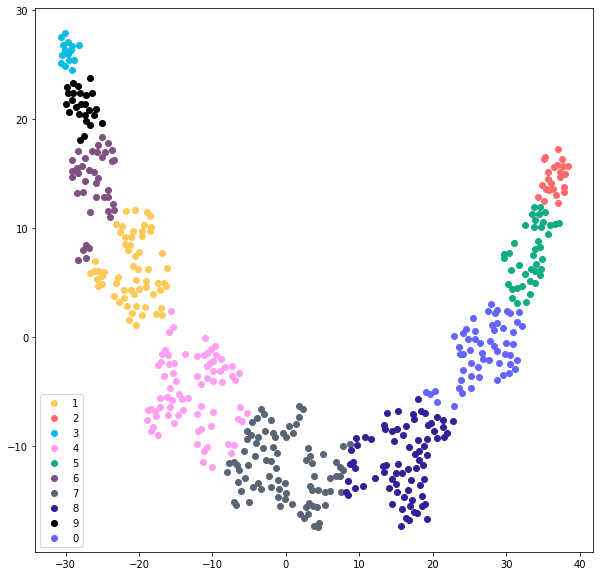

In [16]:
import matplotlib.pyplot as plt

# initialize a matplotlib plot
fig = plt.figure(figsize=(10,10))
ax = fig.add_subplot(111)

# colors_per_class = range(10)
# for every class, we'll add a scatter plot separately
for label in colors_per_class:
    
#     print(label)
    # find the samples of the current class in the data
    indices = [i for i, l in enumerate(lab) if l == label]
#     print(indices)
    # extract the coordinates of the points of this class only
    current_tx = np.take(tx, indices)
    current_ty = np.take(ty, indices)

    # convert the class color to matplotlib formatprint(lab.shape)
    color = np.array(colors_per_class[label], dtype=np.float) / 255

    # add a scatter plot with the corresponding color akmeans.cluster_centers_nd label
    ax.scatter(current_tx, current_ty, color=color, label=label)

# build a legend using the labels we set previously
ax.legend(loc='best')

# finally, show the plot
plt.show()